### Import

In [86]:
import numpy as np
import pandas as pd
import xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import *
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.core.display import Image 
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import io
from sklearn.preprocessing import Imputer
import pydot
from sklearn import preprocessing
import lightgbm as lgb
from scipy.stats import mode
import re
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from lightgbm import plot_importance
import warnings
warnings.filterwarnings('ignore')

---

### Classification Setting

In [87]:
def pre_setting():
    last_train_data_add = pd.read_csv("last_train_data_add.csv")
    last_test_data_add = pd.read_csv("last_test_data_add.csv")
    
    X = last_train_data_add
    y = last_test_data_add
    
    model_lgb = lgb.LGBMClassifier(nthread=3, reg_alpha=1.0)
    model_qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    model_lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True)
    model_xg = XGBClassifier(nthread=3)
    model_age_forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
    model_lgr = LogisticRegression()
    
    return X, y, model_lgb, model_qda, model_lda, model_xg

X, y, model_lgb, model_qda, model_lda, model_xg = pre_setting()

### Classification Analysis Kaggle

In [88]:
def submit_kaggle(df_train, df_test, model, path, user_id = "id", target = "country_destination"):
    
    le = LabelEncoder()
    
    y_train = le.fit_transform(df_train[target])
    X_train = df_train.drop([target, user_id], axis = 1)
    
    X_test_id = df_test[user_id]
    X_test = df_test.drop([user_id, target], axis = 1)
    
    print("model fitting 시작")
    model = model.fit(X_train, y_train)
    predic_proba = model.predict_proba(X_test)
    print("model fitting 종료")

    df_submit = pd.DataFrame(columns=["id", "country"])
    ids = []
    cts = []
    for i in range(len(X_test_id)):
        idx = X_test_id.iloc[i]
        ids += [idx] * 5
        cts += le.inverse_transform(np.argsort(predic_proba[i])[::-1])[:5].tolist()
    df_submit["id"] = ids
    df_submit["country"] = cts
    df_submit.to_csv(path, index = False)
    print("csv file 생성")
    !kaggle competitions submit -c airbnb-recruiting-new-user-bookings -f {path} -m "Message"

In [89]:
submit_kaggle(X, y, model_lgb, './submission/submit.csv', "id", "country_destination")

model fitting 시작
model fitting 종료
csv file 생성
Successfully submitted to Airbnb New User Bookings

### Classification Importance Check

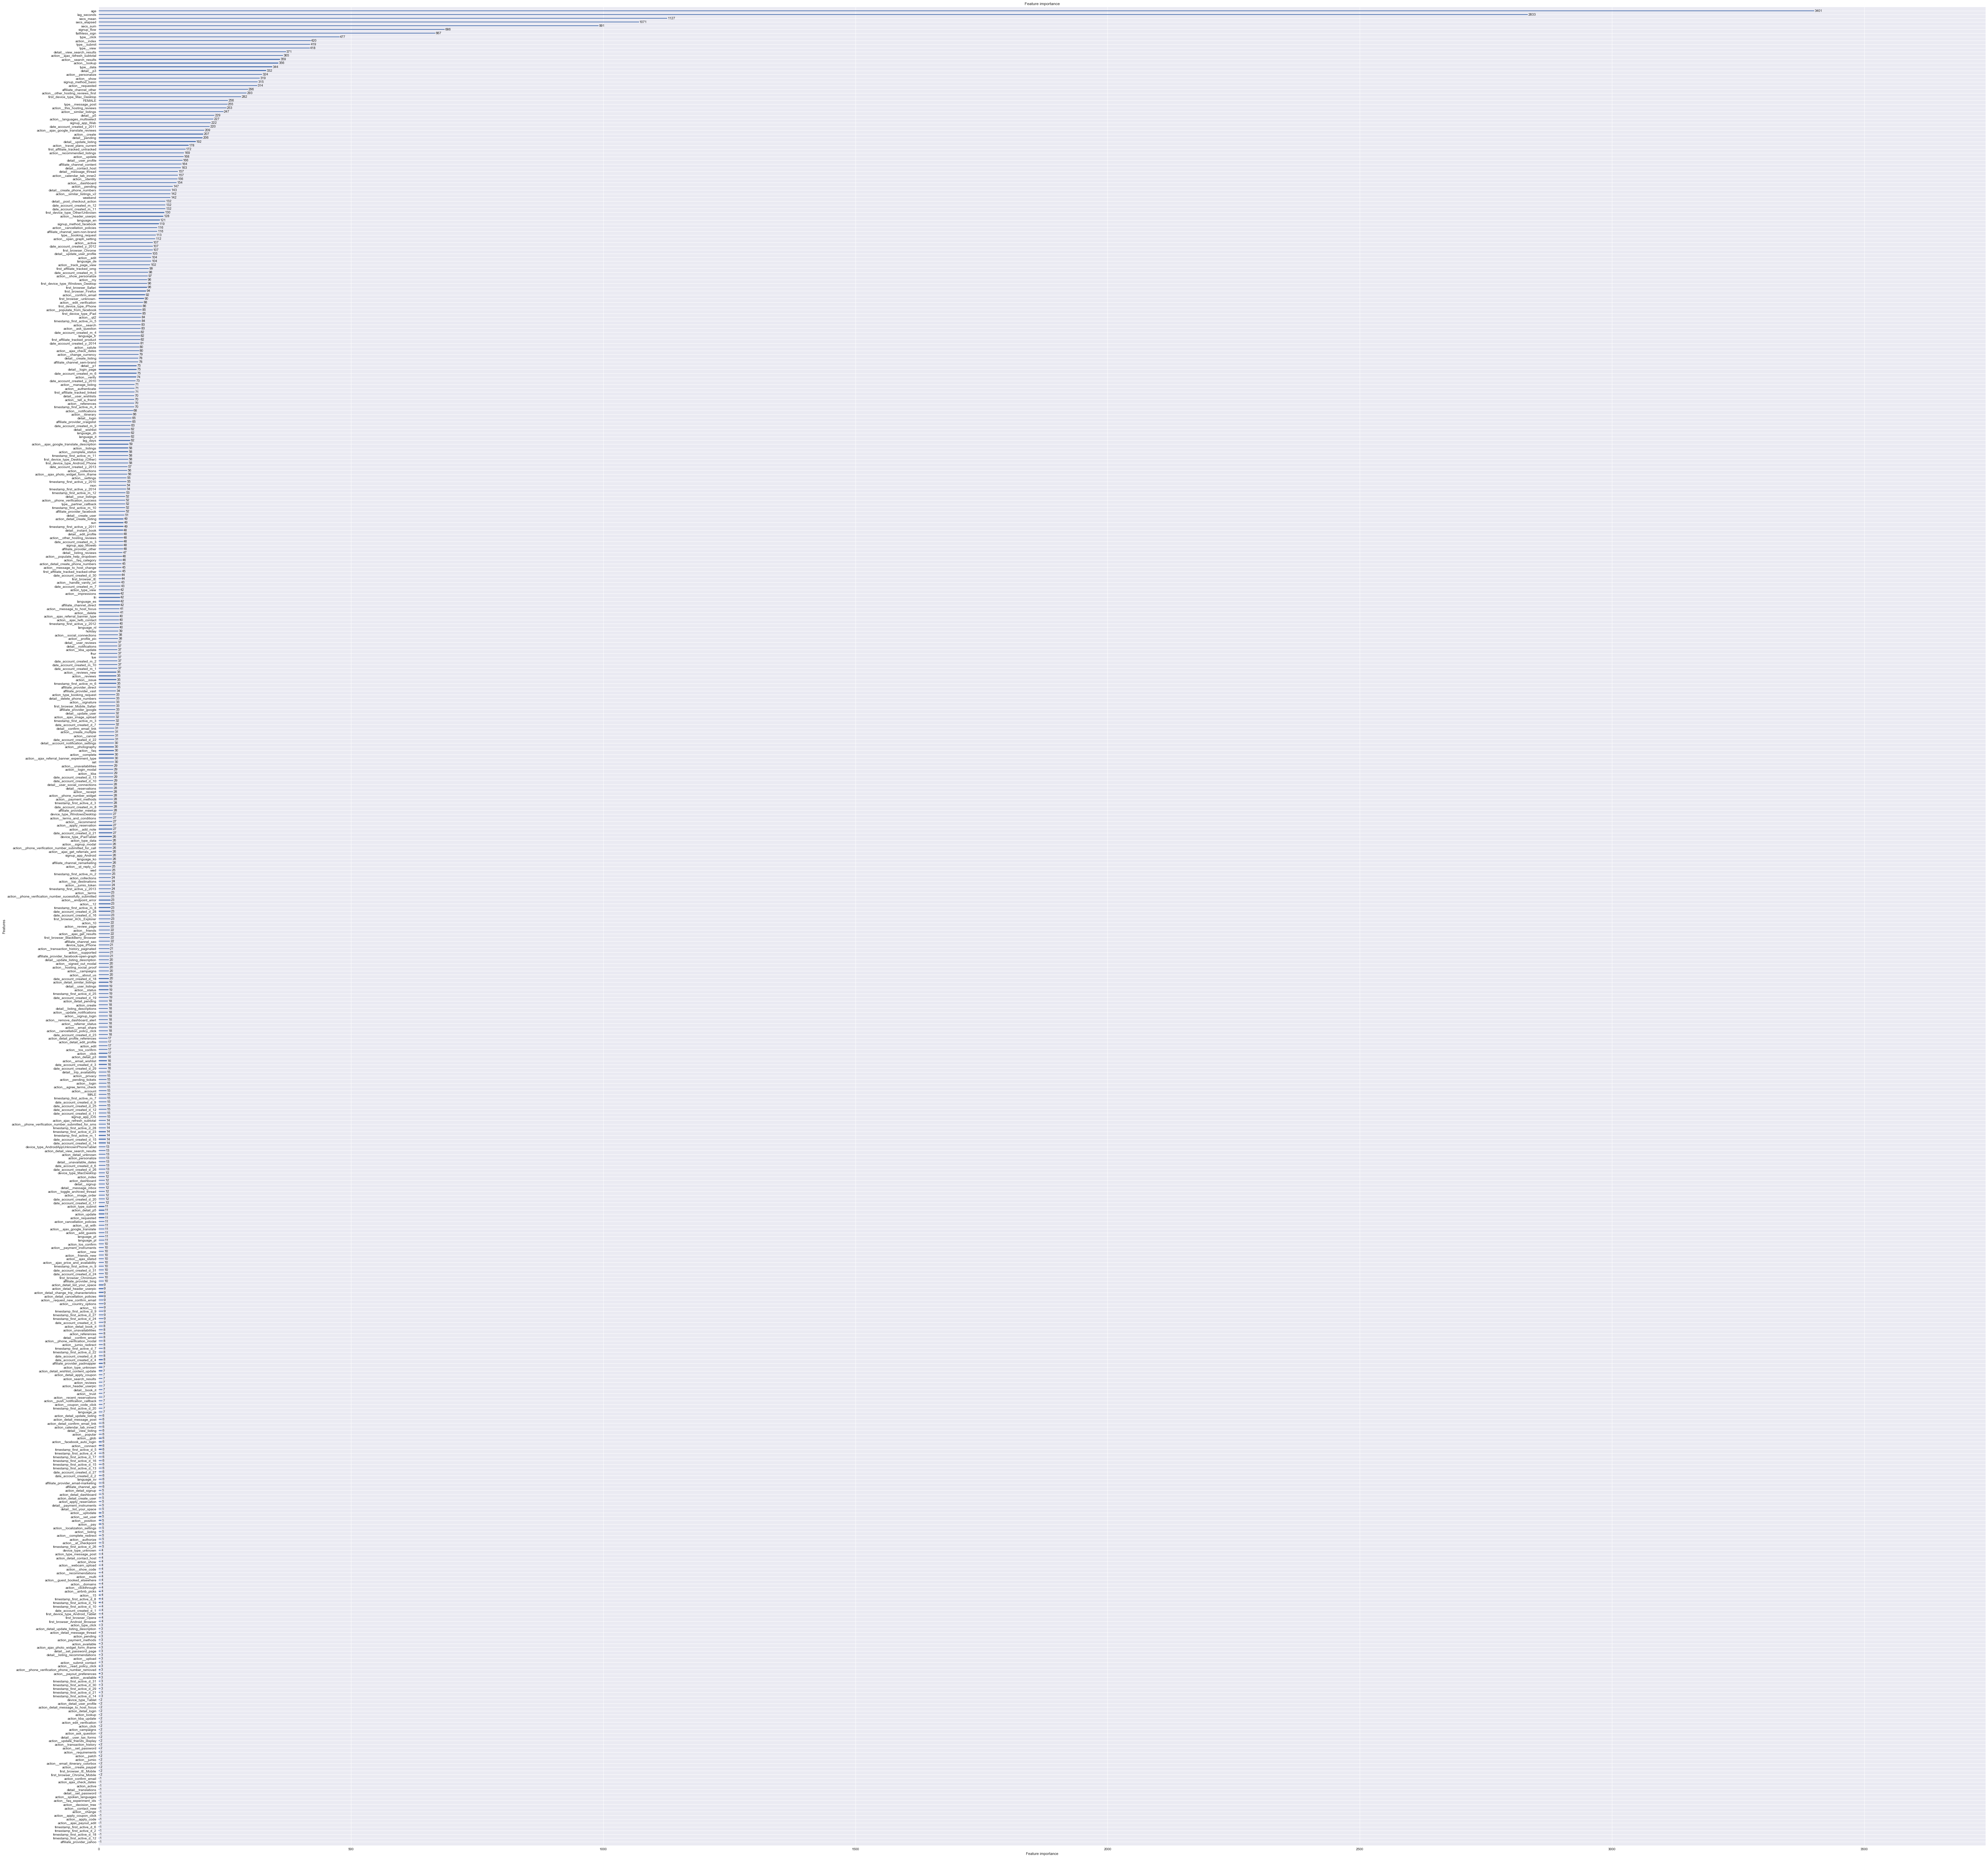

In [115]:
plot_importance(model_lgb, figsize=(100, 100))

### Kaggle Point = 0.88461

In [110]:
le = preprocessing.LabelEncoder()
y_label = le.fit_transform(X['country_destination']) 

### accuracy_score

In [112]:
print(accuracy_score(y_label, model_lgb.predict(X.drop(["id", "country_destination"], axis=1))))

0.6563259799213907


### classification_report

In [114]:
print(classification_report(y_label, \
                            model_lgb.predict(X.drop(["id", "country_destination"], axis=1))))

             precision    recall  f1-score   support

          0       1.00      0.01      0.01       539
          1       1.00      0.01      0.02      1428
          2       1.00      0.01      0.01      1061
          3       1.00      0.01      0.02      2249
          4       0.94      0.01      0.02      5024
          5       1.00      0.01      0.01      2324
          6       1.00      0.01      0.02      2835
          7       0.71      0.87      0.78    124549
          8       1.00      0.01      0.02       762
          9       1.00      0.03      0.05       217
         10       0.52      0.51      0.52     62379
         11       0.94      0.01      0.01     10094

avg / total       0.69      0.66      0.61    213461



---

### Classification Importance Choice

In [101]:
def model_importance_feature():

    importances = model_lgb.feature_importances_
    importances = pd.DataFrame(importances, columns=["importance"])

    i_c = X.drop(["id", 'country_destination'],axis=1)
    i_c = i_c.columns
    i_c = pd.DataFrame(i_c, columns=["name"])
    f_i = pd.concat([i_c,importances],axis=1)

    f_i_test3 = f_i[f_i['importance'] < 3]

    f_i_test3_l = list(f_i_test3["name"])

    X_test_3 = X.drop(f_i_test3_l,axis=1)
    y_test_3 = y.drop(f_i_test3_l, axis=1)
    
    return X_test_3, y_test_3

X_test_3, y_test_3 = model_importance_feature()

### Classification Setting

In [102]:
X_test_3 = pd.read_csv("last_train.csv")
y_test_3 = pd.read_csv("last_test.csv")

model_lgb_i = lgb.LGBMClassifier(nthread=3, reg_alpha=1, n_estimators=100)
model_qda_i = QuadraticDiscriminantAnalysis(store_covariance=True)
model_lda_i = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True)
model_xg_i = XGBClassifier(nthread=3)
model_age_forest_i = ExtraTreesClassifier(n_estimators=250, random_state=0)
model_lgr = LogisticRegression()

### Classification Analysis Kaggle

In [103]:
submit_kaggle(X_test_3, y_test_3, model_lgb_i, './submission/submit.csv', "id", "country_destination")

model fitting 시작
model fitting 종료
csv file 생성
Successfully submitted to Airbnb New User Bookings

### Classification Importance Check

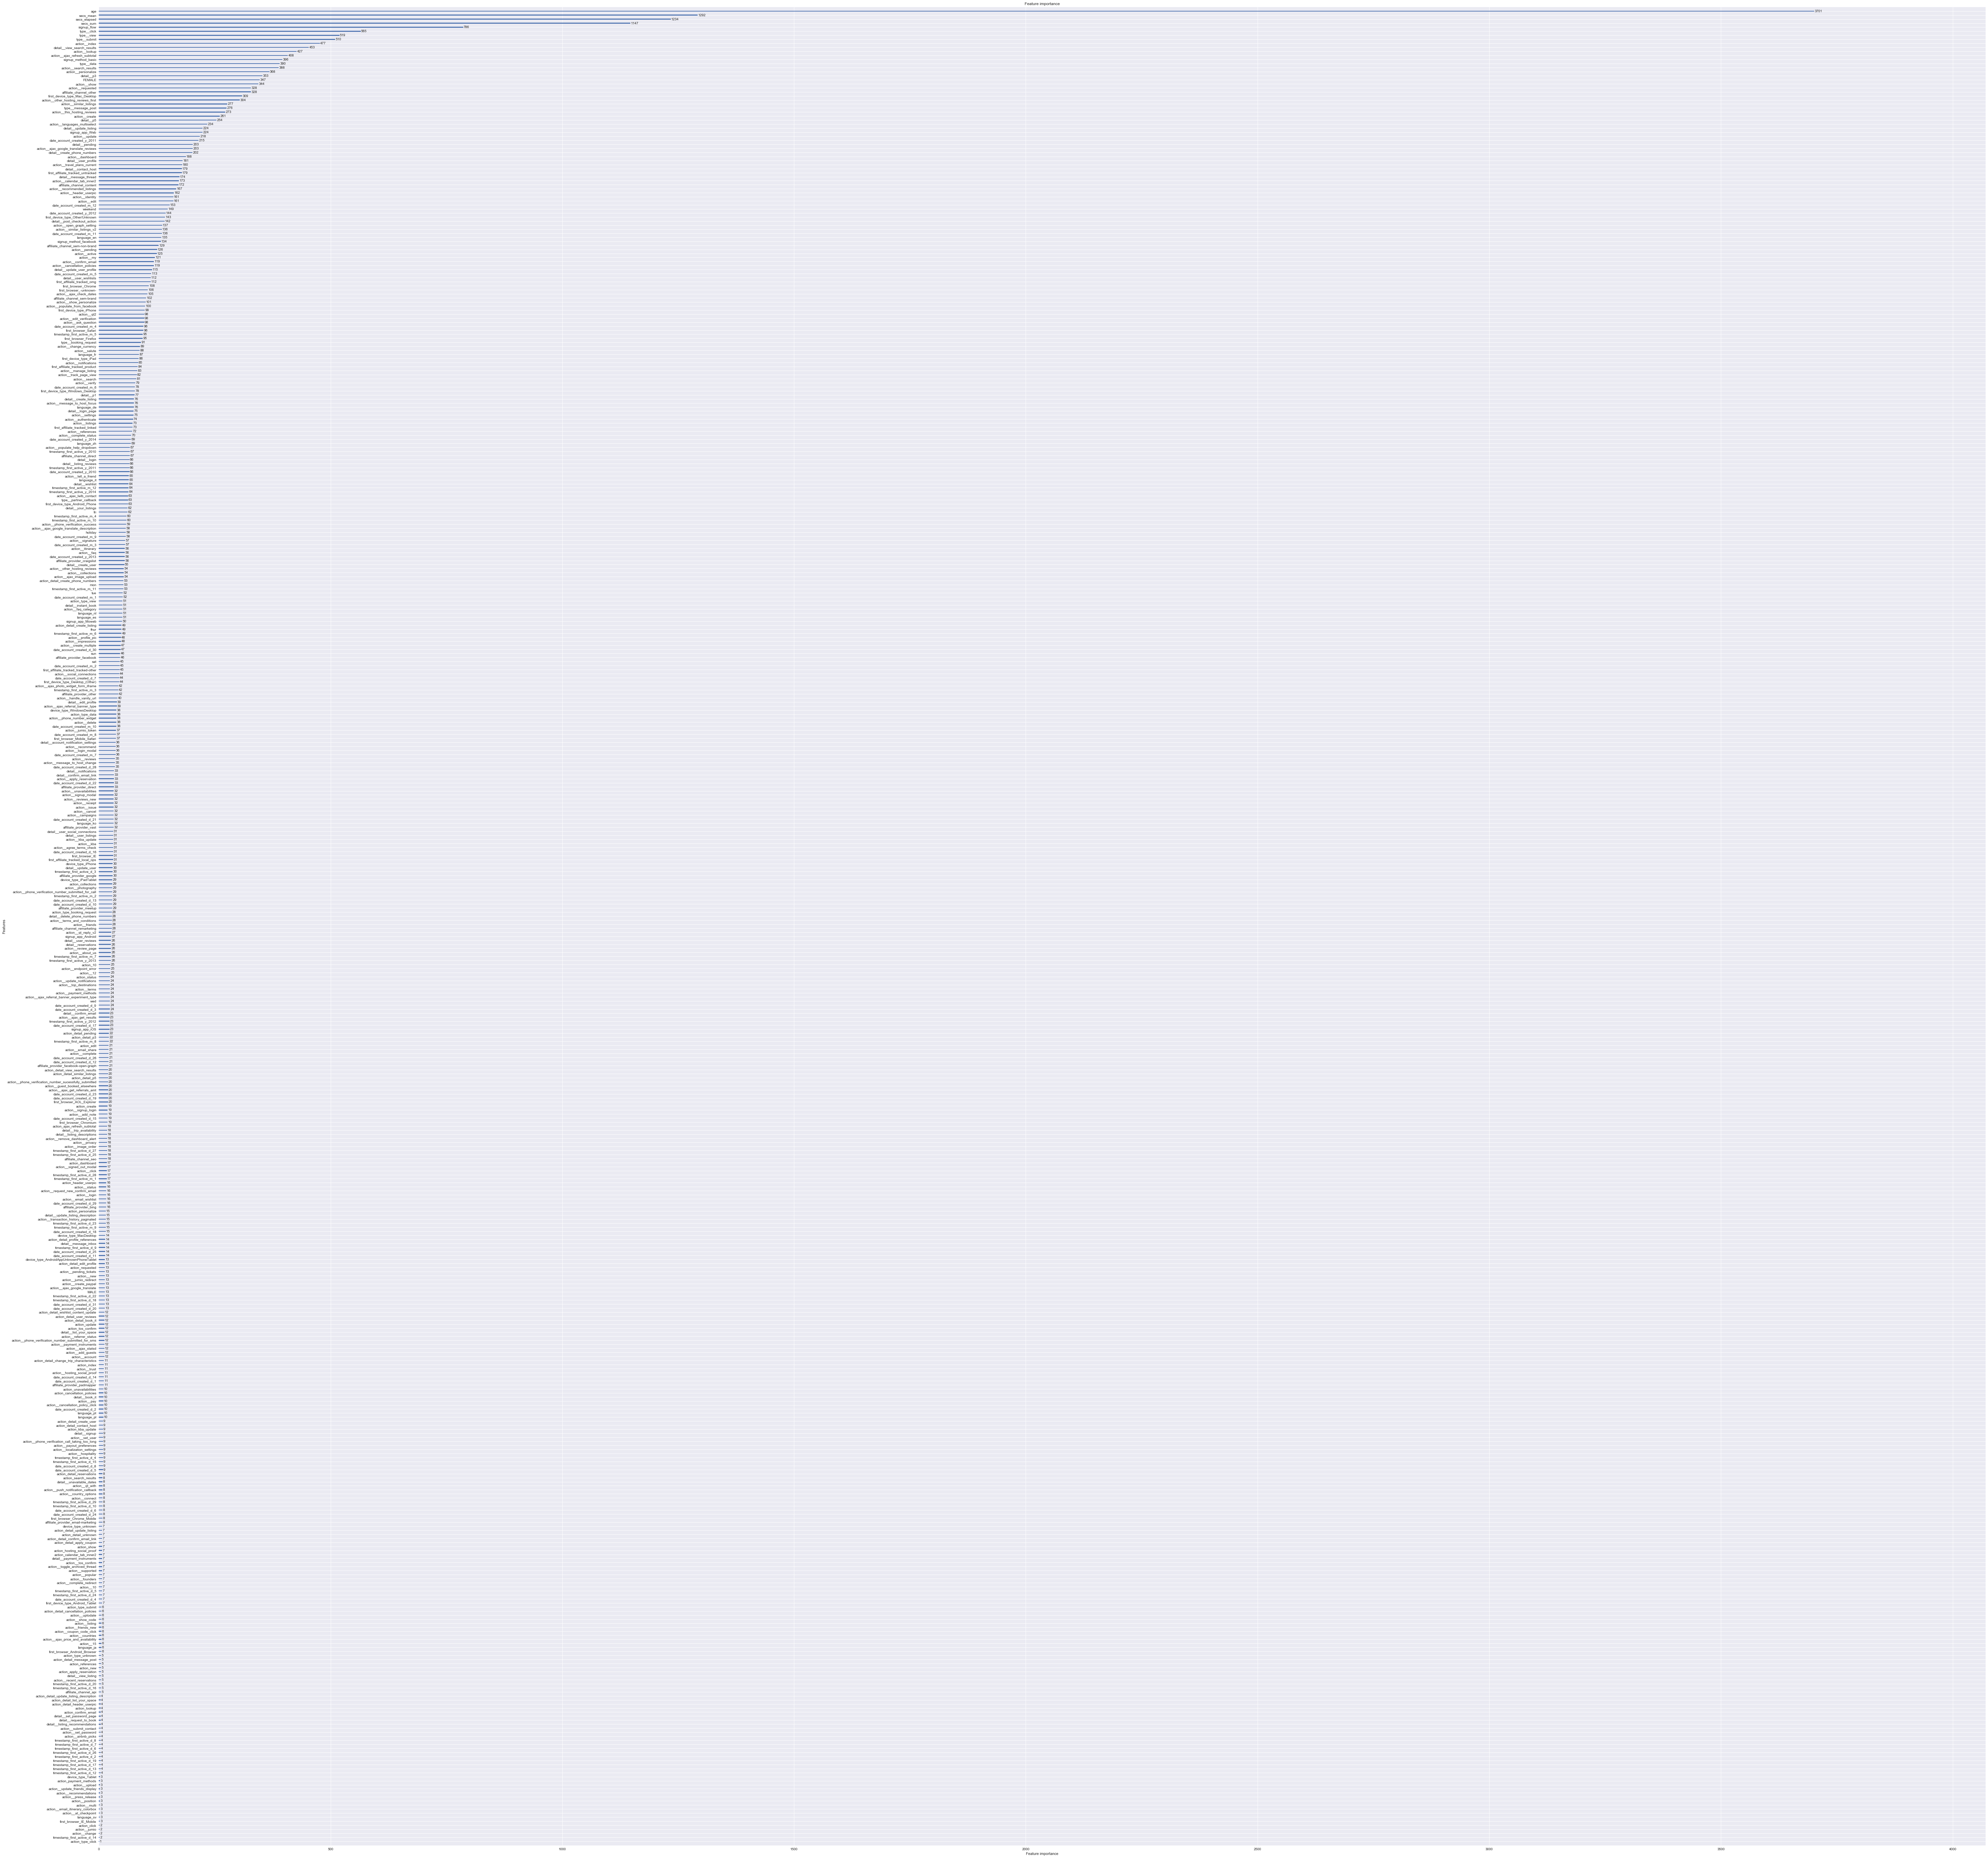

In [22]:
plot_importance(model_lgb_i, figsize=(100, 100))

### Kaggle Point = 0.88425

In [105]:
le = preprocessing.LabelEncoder()
y_label = le.fit_transform(X_test_3['country_destination']) 

### accuracy_score

In [107]:
print(accuracy_score(y_label, model_lgb_i.predict(X_test_3.drop(["id", "country_destination"], axis=1))))

0.6540913796899668


### classification_report

In [108]:
print(classification_report(y_label, \
                            model_lgb_i.predict(X_test_3.drop(["id", "country_destination"], axis=1))))

             precision    recall  f1-score   support

          0       1.00      0.01      0.01       539
          1       1.00      0.01      0.02      1428
          2       1.00      0.01      0.02      1061
          3       1.00      0.01      0.02      2249
          4       0.92      0.01      0.02      5024
          5       1.00      0.00      0.01      2324
          6       0.96      0.01      0.02      2835
          7       0.70      0.87      0.78    124549
          8       1.00      0.01      0.03       762
          9       1.00      0.04      0.07       217
         10       0.52      0.49      0.51     62379
         11       1.00      0.01      0.01     10094

avg / total       0.69      0.65      0.60    213461



---

### Classification Analysis Choice Make Data

In [109]:
last_train = X_test_3.to_csv("last_train.csv", index=False)
last_test = y_test_3.to_csv("last_test.csv", index=False)

---

### DecisionTree image

In [59]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X_test_3.drop(['id', 'country_destination'],axis=1), y_label)

In [60]:
def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=X_test_3.columns.drop(['id', 'country_destination']))
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

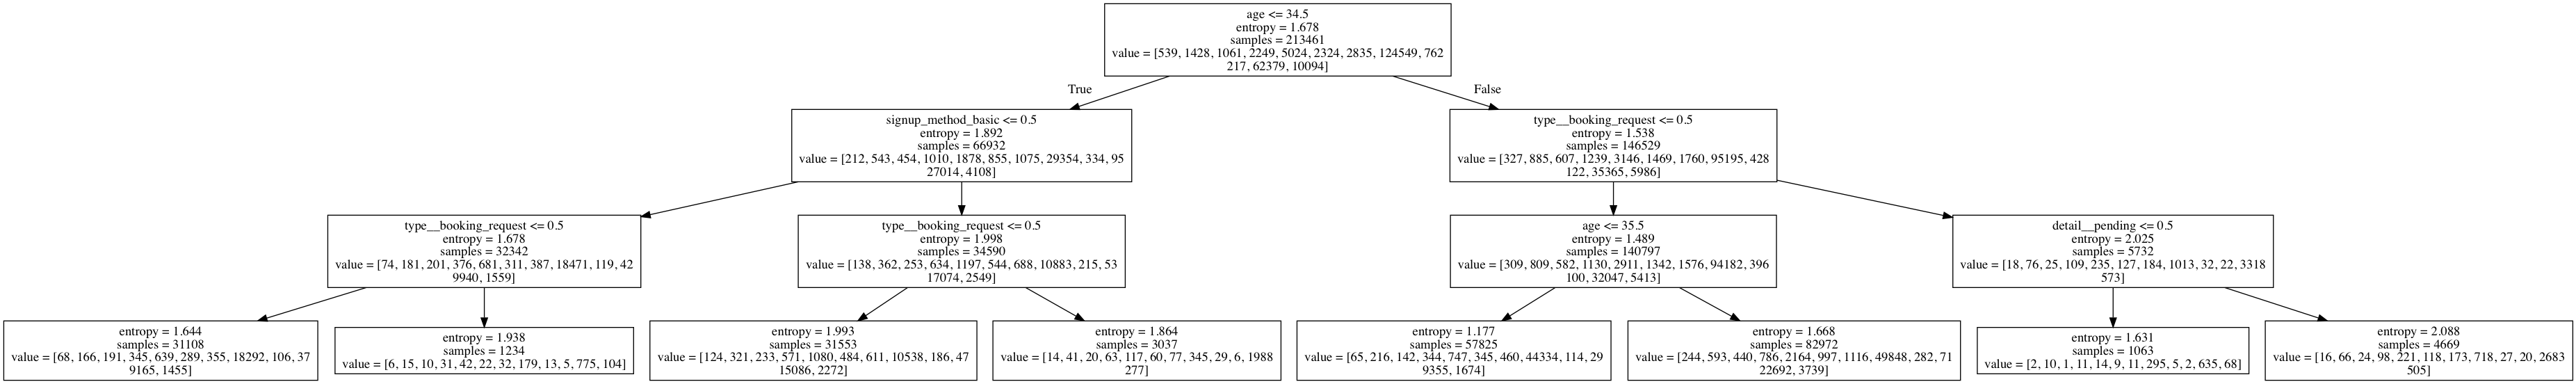

In [61]:
draw_decision_tree(tree)

---

In [ ]:
submit_kaggle(X_test_3, y_test_3, tree1, './submission/submit_xg.csv', "id", "country_destination")

In [ ]:
# K=fold

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

# le = LabelEncoder()

# y_train = le.fit_transform(df_train[target])
# X_train = df_train.drop([target, user_id], axis = 1)

# X_test_id = df_test[user_id]
# X_test = df_test.drop([user_id, target], axis = 1)

# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
# scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

# print("model fitting 시작")
# model = model.fit(X_train, y_train)
# predic_proba = model.predict_proba(X_test)
# print("model fitting 종료")

### Importance 200 이상 체크

In [30]:
importances = model_lgb_i.feature_importances_
importances = pd.DataFrame(importances, columns=["importance"])

i_c = X_test_3.drop(["id", 'country_destination'],axis=1)
i_c = i_c.columns
i_c = pd.DataFrame(i_c, columns=["name"])
f_i = pd.concat([i_c,importances],axis=1)

f_i_test3 = f_i[f_i['importance'] > 200]

f_i_test3_l = list(f_i_test3["name"])

X_test_3 = X.drop(f_i_test3_l,axis=1)
y_test_3 = y.drop(f_i_test3_l, axis=1)

In [35]:
f_i_test3.sort_values("importance", ascending=False)

,name,importance
153,age,3866
453,secs_mean,1345
451,secs_elapsed,1218
452,secs_sum,1205
0,signup_flow,717
171,type__view,643
166,type__click,584
241,action__index,512
170,type__submit,482
167,type__data,473


---

In [ ]:
# pro_t = model_des_forest.predict_proba(last_test_data.drop(["id", "country_destination"], axis=1))

# ids = []  #list of ids
# cts = []  #list of countries
# for i in range(len(sample_submission_NDF)):
#     idx = sample_submission_NDF.iloc[i, 0]
#     ids += [idx] * 5
#     cts += le.inverse_transform(np.argsort(pro_t[i])[::-1])[:5].tolist()

# df_sample1 = pd.DataFrame(columns=['id', 'country'])
# df_sample1['id'] = ids
# df_sample1['country'] = cts
# df_sample1 = df_sample1.reset_index(drop=True)
# df_sample1.to_csv('./submission/submission.csv', sep=',', na_rep='NaN', index = False)